<a href="https://colab.research.google.com/github/JoshuaYosen/honey-bee-prediction/blob/master/Honey_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Background**


The purpose of this project is to take relevant data about the decline in honey production. Over the past decade, Honey Bees have been dying off. Honey Bees are responsible for pollinating much of the worlds flora. With the Honey Bees population declining, we are seeing a global shortage of the flora used for producing the food we eat. This effects the animals who also eat their food, causing a decline of animal populations and a huge shift in ecosystems. Less plants effect the unique biosphere of the environment, changing the landscape as well as the amount of oxygen in the atmoshpere. Needless to say, Honey Bees are a major factor in the many roles and systems that we benefit from. 

**Objective**


This project uses data about the decline of honey production and uses Linear Regression Machine Learning techniques to create a projection of that decline for future decades.

In [2]:
#import modules
import seaborn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

#read and show data
df = pd.read_csv("https://s3.amazonaws.com/codecademy-content/programs/data-science-path/linear_regression/honeyproduction.csv")

print(df.head())



  state    numcol  yieldpercol   totalprod      stocks  priceperlb  \
0    AL   16000.0           71   1136000.0    159000.0        0.72   
1    AZ   55000.0           60   3300000.0   1485000.0        0.64   
2    AR   53000.0           65   3445000.0   1688000.0        0.59   
3    CA  450000.0           83  37350000.0  12326000.0        0.62   
4    CO   27000.0           72   1944000.0   1594000.0        0.70   

    prodvalue  year  
0    818000.0  1998  
1   2112000.0  1998  
2   2033000.0  1998  
3  23157000.0  1998  
4   1361000.0  1998  


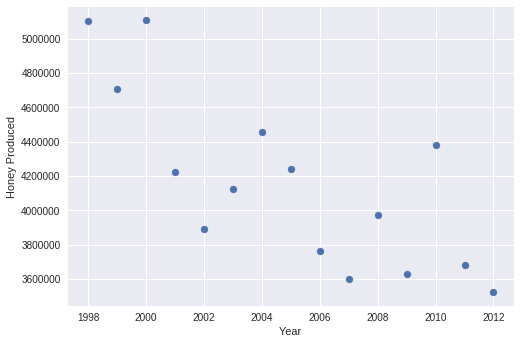

In [5]:
#groups and creates a scatter plot of honey production
prod_per_year = df.groupby('year').totalprod.mean().reset_index()

x = prod_per_year.year

x = x.values.reshape(-1, 1)

y = prod_per_year.totalprod

plt.xlabel('Year')

plt.ylabel('Honey Produced')

plt.scatter(x, y)

We can see from the graph above that since 1998 to 2012, the amount of honey produced has dropped by almost 200,000.

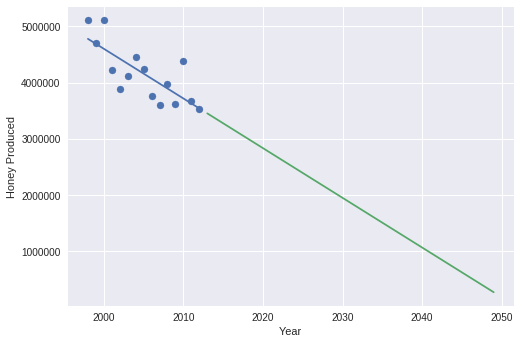

In [11]:
#repeats code from above to visualize scatter plot on new plot
prod_per_year = df.groupby('year').totalprod.mean().reset_index()

x = prod_per_year.year

x = x.values.reshape(-1, 1)

y = prod_per_year.totalprod

plt.xlabel('Year')

plt.ylabel('Honey Produced')

plt.scatter(x, y)


#creates the Linear Regression model from sci-kit
regr = linear_model.LinearRegression()
regr.fit(x, y)



#using regression model to predict x and y to plot linear regression
y_predict = regr.predict(x)

plt.plot(x, y_predict)

x_future = np.array(range(2013, 2050))

x_future = x_future.reshape(-1, 1)

future_predict = regr.predict(x_future)

#plots predicted linear regression 
plt.plot(x_future, future_predict)
plt.show()

**Analysis**


From the graph above we can see how in just a few short decades the decline of honey production quickly begins to reach zero.

An important question to ask is, how accurate is this model? If we assume that all variables remain the same that contributes to the decline in honey, a linear regression model is not a bad way to predict future results. However, a linear regression model only accounts for current results. It doesn't look at or consider any variables for why honey is declining. Nor does it give us insights into the why. 

In this case, Linear Regression is useful in predicting future outcomes given a very very stable system (meaning no variables contributing to the trends change). If the system is more dynamic, like most of reality is, this model doesn't take into account enough information to provide trustworthy results. If we had a larger data set and used an error calculation such as MSE then we could numerically determine the accuracy of our model. Doing an MSE on this small of a dataset would be misleading.

In addition, it doesn't tell us the why. Why are the honey bees dying off? We are left with this question if we wish to change the trend. It is unlikely that any model would answer this question. Even deep learning models with convulted neural networks could only tell us patterns within the results. Additional scientific and behavioral research on the bees and their environment are necessary to begin discovering the key variables for the decline.

